# '123' Example

In [1]:
import sys; sys.path.insert(0,"../")
import numpy as np
import random
import matplotlib.pyplot as plt
#%matplotlib notebook

import mview

A 10K points version of 123 can be found here:

In [2]:
path = 'data/123/input/'
X_true = np.genfromtxt(path+'spicy_rice_10000_123.csv', delimiter=',')
Y1 = np.genfromtxt(path+'spicy_rice_10000_1.csv', delimiter=',')
Y2 = np.genfromtxt(path+'spicy_rice_10000_2.csv', delimiter=',')
Y3 = np.genfromtxt(path+'spicy_rice_10000_3.csv', delimiter=',')

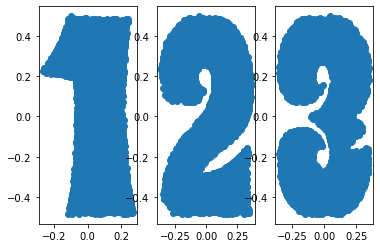

In [3]:
fig, ax = plt.subplots(1,3)
ax[0].plot(Y1[:,0],Y1[:,1],'o')
ax[1].plot(Y2[:,0],Y2[:,1],'o')
ax[2].plot(Y3[:,0],Y3[:,1],'o')

We will run the experiment with 1000 points, so that the nodes are easier to see. The following subset of the data above was especially selected so that the nodes are well separated (making a nicer picture).

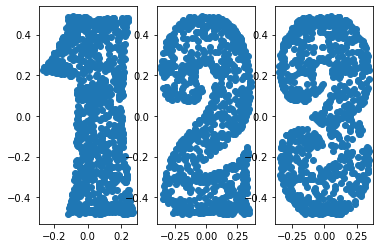

In [4]:
X_true = np.genfromtxt(path+'spicy_rice_1000_123.csv', delimiter=',')
Y1 = np.genfromtxt(path+'spicy_rice_1000_1.csv', delimiter=',')
Y2 = np.genfromtxt(path+'spicy_rice_1000_2.csv', delimiter=',')
Y3 = np.genfromtxt(path+'spicy_rice_1000_3.csv', delimiter=',')
fig, ax = plt.subplots(1,3)
ax[0].plot(Y1[:,0],Y1[:,1],'o')
ax[1].plot(Y2[:,0],Y2[:,1],'o')
ax[2].plot(Y3[:,0],Y3[:,1],'o')

## Fixed projections

Lets run an experiment from this data, using only a portion of the points, and using the (fixed) true projections ('cylinder' for this example).

For fixed projections, mview.basic finds the global solution very easily (for any average_neighbors).

In [5]:
mv = mview.basic([Y1,Y2,Y3],Q='cylinder',
                 batch_size = 20,
                 max_iter=300, min_grad=1e-5, min_cost=1e-5,
                 verbose=2)

mview.MPSE():
  data details:
    number of perspectives : 3
    number of samples : 1000
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.87e-04
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.04e-04
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.24e-04
  initialize:
    fixed embedding : False
    initial embedding : random
    fixed proj

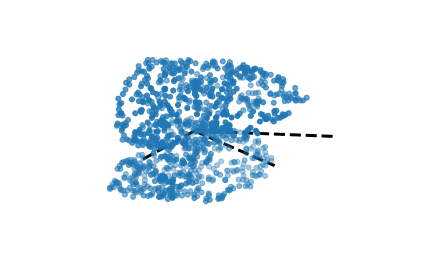

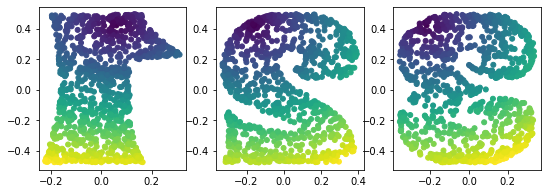

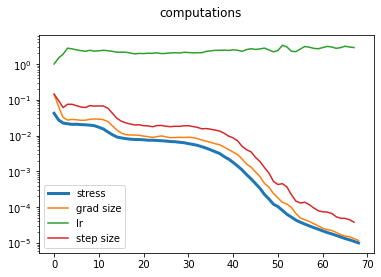

<Figure size 432x288 with 0 Axes>

In [6]:
mv.plot_embedding()
mv.plot_images()
mv.plot_computations()

#path = 'data/123/output/'
#np.savetxt(path+'fixed_123.csv',mv.X,delimiter=',')
#np.savetxt(path+'fixed_1.csv',mv.Y[0],delimiter=',')
#np.savetxt(path+'fixed_2.csv',mv.Y[1],delimiter=',')
#np.savetxt(path+'fixed_3.csv',mv.Y[2],delimiter=',')

## Varying projections w/out smart initialization

By default, basic uses smart initialization if possible.

In [7]:
mv = mview.basic([Y1,Y2,Y3],
                 batch_size = 20,
                 max_iter=300, min_grad=1e-5, min_cost=1e-5,
                 smart_initialize = False,
                 verbose=2)


mview.MPSE():
  data details:
    number of perspectives : 3
    number of samples : 1000
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.81e-04
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.35e-04
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.23e-04
  initialize:
    fixed embedding : False
    initial embedding : random
    fixed proj

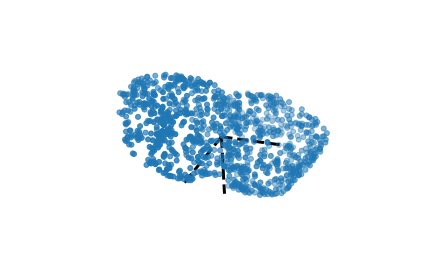

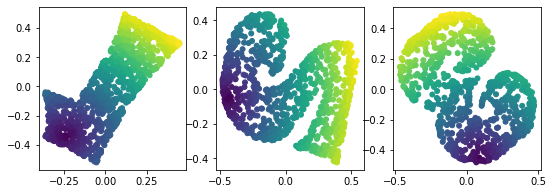

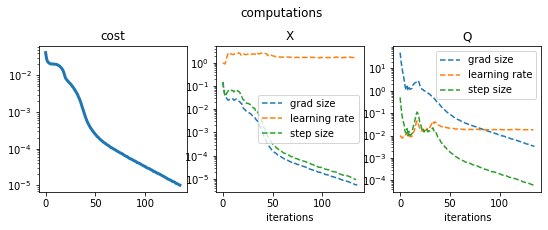

In [8]:
mv.plot_embedding()
mv.plot_images()
mv.plot_computations()

## Varying projections w/ smart initialization

If we add 'smart_initialize', then the algorithm does better (find the global minimum more often). The average_neighbors needs to be higher (I get correct results with 16).

Note: The plots for the history look a little weird. This is because I am combining results from each computation (MDS embedding of combined distances, MPSE search of projections that best fit MDS initialization, then regular coordinate adaptive GD to find solution). I'll update soon to divide the costs from different parts of the algorithm more efficiently (so the two spikes in the middle of the graph don't mean that something is wrong, but rather that we are changing objective function).

In [9]:
mv = mview.basic([Y1,Y2,Y3],
                 batch_size = 10,
                 max_iter=200, min_grad=1e-5,min_cost=1e-5,
                 verbose=2)

mview.MPSE():
  data details:
    number of perspectives : 3
    number of samples : 1000
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.94e-04
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.29e-04
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 9.24e-04
  initialize:
    fixed embedding : False
    initial embedding : random
    fixed proj

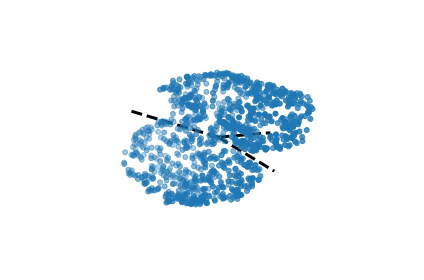

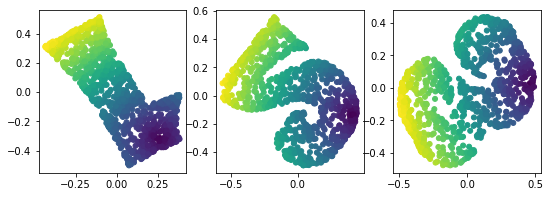

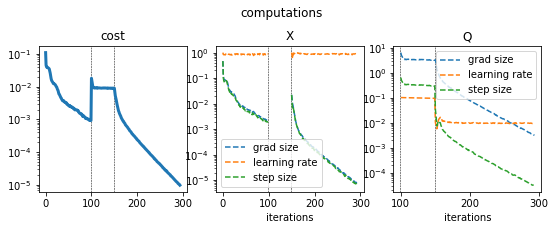

In [10]:
mv.plot_embedding()
mv.plot_images()
mv.plot_computations()

#path = 'data/123/output/'
#np.savetxt(path+'varying_123.csv',mv.X,delimiter=',')
#np.savetxt(path+'varying_1.csv',mv.Y[0],delimiter=',')
#np.savetxt(path+'varying_2.csv',mv.Y[1],delimiter=',')
#np.savetxt(path+'varying_3.csv',mv.Y[2],delimiter=',')
#np.save(path+'varying_Q',mv.Q)

There is some issues with 'smart_initialize' that I must still resolve, such as dealing correctly with different embedding/projection dimensions and number of perspectives.

Since getting that right seems that will indeed be important, I'll be working on that and update soon.

## Using tsne

Let us now run mpse using fixed projections (cylinder), but minimizing tsne error in each of the images. Note: 

In [11]:
mv = mview.basic([Y1,Y2,Y3],Q='cylinder',
                 batch_size=10,
                 max_iter=300, min_grad=1e-5,lr=10,min_cost=1e-4,
                 verbose=2,
                 visualization_method='tsne')

mview.MPSE():
  data details:
    number of perspectives : 3
    number of samples : 1000
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : tsne
  setup visualization instance for perspective 1 :
    mview.TSNE():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
        perplexity : 30.00
  setup visualization instance for perspective 2 :
    mview.TSNE():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
        perplexity : 30.00
  setup visualization instance for perspective 3 :
    mview.TSNE():
      data details:
        number of samples : 1000
      embedding details:
        embedding dimension : 2
        perplexity : 30.00
  initialize:
    fixed embedding : False
    initial embedding : random
    fixed projections : True
  MPSE.gd():
      initial stress : 3.62e+00
      mpse method : fixed projections


ValueError: setting an array element with a sequence.

In [ ]:
mv.plot_embedding()
mv.plot_images()
mv.plot_computations()